<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



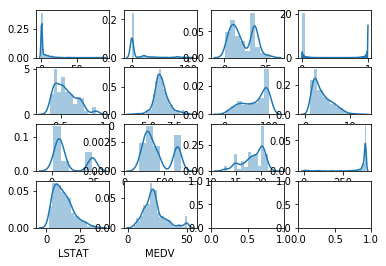

In [27]:
fig, axes = plt.subplots(nrows=4, ncols=4)
#plt.figure(figsize=(25,10))
for i, column in enumerate(data.columns):
    sns.distplot(data[column],ax=axes[i//4,i%4])

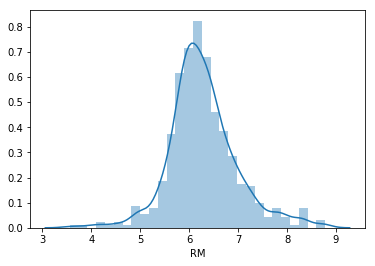

In [28]:
# RM похоже на нормальное распределение
sns.distplot(data['RM'])

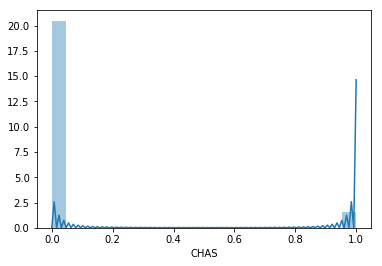

In [29]:
# похоже на Бета-распределение
sns.distplot(data['CHAS'])

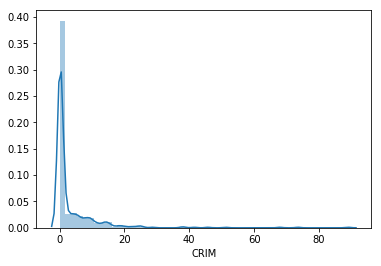

In [30]:
# похоже на Лог-логистическое распределение
sns.distplot(data['CRIM'])

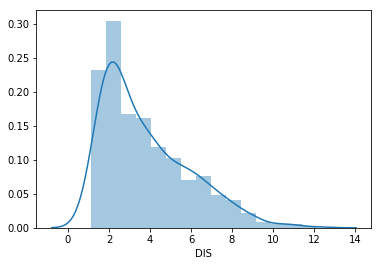

In [36]:
# похоже на распределении Chi-square 
# либо экспоненицальное 
# либо Gamma
sns.distplot(data['DIS'])

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

**Самое большое положительное значение с переменной RM (average number of rooms per dwelling), самое большое отрицательное с LSTAT (percentage lower status of the population), в принципе ничего удивительного нет**

In [4]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1,-0.2,0.41,-0.056,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.2,1,-0.53,-0.043,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1,0.063,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.056,-0.043,0.063,1,0.091,0.091,0.087,-0.099,-0.0074,-0.036,-0.12,0.049,-0.054,0.18
NOX,0.42,-0.52,0.76,0.091,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.091,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.087,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.099,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.63,-0.31,0.6,-0.0074,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.036,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [65]:
#Для sklearn сделаем reshape(-1,1) и преобразуем Series данные в numpy array
medv = np.array(data['MEDV']).reshape(-1,1)
lstat = np.array(data['LSTAT']).reshape(-1,1)

In [66]:
# Разделим на 80% тренировочных и на 20% тестовых
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    lstat,
    medv,
    test_size = 0.2
)

In [67]:
# Обучим модель с помощью fit() метода
model_fit = model.fit(X_train, y_train) 

In [52]:
# Посмотрим предсказания модели на тестируемых данных
predicted_y = model.predict(X_test)

In [70]:
r_sq = model_fit.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5534206542789916


**Наша модель всего лишь на 55 % объясняет данные о цене на дом**

In [71]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: [34.26196265]
slope: [[-0.92585979]]


значение $b_0 = 5.63$ показывает, что наша модель предсказывает ответ $5.63$, когда $x$ равно 0. Значение $b_1 = 0.54$ означает, что прогнозируемый ответ увеличивается на $0,54$, когда $x$ увеличивается на единицу.

In [53]:
# Посчитаем ошибку модели
print(mean_squared_error(predicted_y, y_test))
print(mean_absolute_error(predicted_y, y_test))

31.01145423187093
4.215202320394026


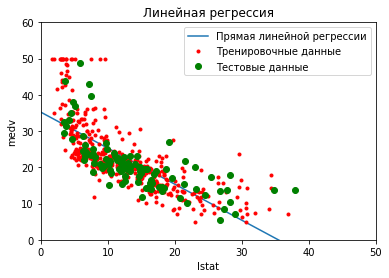

In [57]:
plt.xlabel('lstat')
plt.ylabel('medv')
plt.title('Линейная регрессия')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(0, 50, 50)
# Посчитаем предсказанные значения
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(0,50)
plt.ylim(0,60)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Видим, что цена на дом имеет обратную прямую линейную зависимость от параметра LSTAT, который показывает долю менее статустных людей в округе. Чем больше бедных на районе, тем дешевле жилье

# Happiness
Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [74]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [75]:
data.columns

Index(['Country (region)', 'Ladder', 'SD of Ladder', 'Positive affect',
       'Negative affect', 'Social support', 'Freedom', 'Corruption',
       'Generosity', 'Log of GDP\nper capita', 'Healthy life\nexpectancy'],
      dtype='object')

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [87]:
data.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [89]:
data['Country (region)'].nunique()

156

In [85]:
df = data.dropna()
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             0
Negative affect             0
Social support              0
Freedom                     0
Corruption                  0
Generosity                  0
Log of GDP\nper capita      0
Healthy life\nexpectancy    0
dtype: int64

Сколько стран в выборке? Написать ответ. 

In [90]:
# после удаления пустных значений
df['Country (region)'].nunique()

140

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

In [91]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1,0.56,0.51,0.54,0.83,0.55,0.22,0.49,0.82,0.83
SD of Ladder,0.56,1,0.09,0.63,0.6,0.25,0.25,0.39,0.66,0.64
Positive affect,0.51,0.09,1,0.35,0.43,0.7,0.23,0.42,0.31,0.34
Negative affect,0.54,0.63,0.35,1,0.67,0.42,0.17,0.35,0.57,0.51
Social support,0.83,0.6,0.43,0.67,1,0.48,0.15,0.45,0.8,0.76
Freedom,0.55,0.25,0.7,0.42,0.48,1,0.41,0.5,0.39,0.42
Corruption,0.22,0.25,0.23,0.17,0.15,0.41,1,0.28,0.19,0.15
Generosity,0.49,0.39,0.42,0.35,0.45,0.5,0.28,1,0.46,0.45
Log of GDP per capita,0.82,0.66,0.31,0.57,0.8,0.39,0.19,0.46,1,0.87
Healthy life expectancy,0.83,0.64,0.34,0.51,0.76,0.42,0.15,0.45,0.87,1


* Ожидаемый возраст сильно зависит от ВВП, чем больше ВВП тем дольше люди живут
* Уровень коррупции довольно сильно коррелирует с чувством свободы
* Уровень положительных эмоций положительно коррелиует с чувством свободы

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

#### Распределение Бернулли

C:\Users\Office8\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


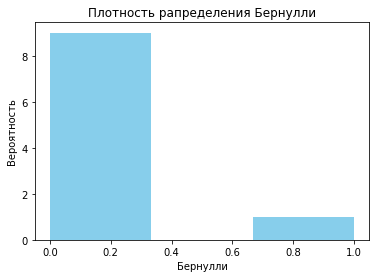

In [94]:
# import seaborn
data_bern = stats.bernoulli.rvs(size=10,p=0.3)
ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Бернулли', ylabel='Вероятность')
plt.title('Плотность рапределения Бернулли')
plt.show()

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

[Text(0,0.5,'Частота (плотность)'), Text(0.5,0,'Биноминальное распределение')]

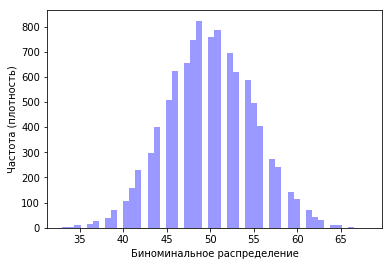

In [98]:
n, p = 100, .5  # number of trials, probability of each trial
data_binom = stats.binom.rvs(n,p,size=10000)
ax = sns.distplot(data_binom,
                  kde=False,
                  color='blue')
ax.set(xlabel='Биноминальное распределение', ylabel='Частота (плотность)')

Случайная величина Бернулли имеет два возможных результата: 0 или 1. Биномиальное распределение - это сумма независимых и одинаково распределенных случайных величин Бернулли.

Если у меня есть монета, то при подбрасывании вероятность выпадения орла равна $p$. Таким образом, вероятность того, что выпадет решка, равна $1 - p$. Если монета выпадет орлом, то я выиграю олин рубль. Если выпадет решка, то ничего. Для одного подбрасывания монеты вероятность выиграть один рубль равна $p$. Случайная величина, которая представляет выигрыш после одного подбрасывания монеты, является случайной величиной Бернулли.

Теперь, если я подброшу монету 5 раз, то выигрыш может составить любое целое число  от нуля до пяти рублей включительно. Вероятность того, что я выиграю 5 рублей, равна $p^5$, потому что каждое подбрасывание монеты не зависит от других, и для каждого подбрасывания монеты вероятность выпадения орла равна $p$. 